In [5]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
from tqdm import tqdm
load_dotenv()

True

In [6]:
# Global Variables
api_key = os.getenv('FMP_API_KEY')
ticker = 'NVDA'
interval = '1hour'
start_date = datetime.strptime('2021-01-01', '%Y-%m-%d') # keep more left tail data to take care of NAs
end_date = datetime.strptime('2024-02-01', '%Y-%m-%d')

In [31]:
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from={start_date}&to={end_date}&apikey={api_key}"
response = requests.get(url).json()

In [38]:
data = pd.DataFrame(response["historical"])
data['date'] = pd.to_datetime(data['date'])
data["return"] = data["close"].pct_change()
data.dropna(inplace=True)
data["realized_vol"] = data["return"].rolling(window=5).std()

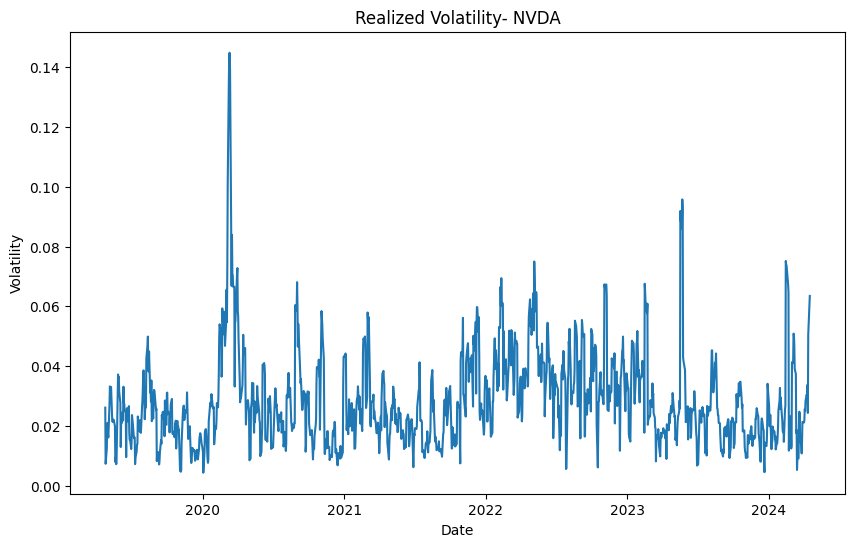

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data["date"],data["realized_vol"])
plt.title('Realized Volatility- NVDA')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

In [41]:
data_list = []

for page in tqdm(range(150)):
    url = f'https://financialmodelingprep.com/api/v3/stock_news?tickers={ticker}&page={page}&apikey={api_key}'

    response = requests.get(url).json()

    for item in response:
        data_list.append({'text': item['text'], 'publishedDate': item['publishedDate']})

news_data = pd.DataFrame(data_list)

news_data.head()

100%|██████████| 150/150 [03:20<00:00,  1.34s/it]


,text,publishedDate
0,Many artificial intelligence stocks are tradin...,2024-04-24 04:32:00
1,Artificial intelligence (AI) has long tantaliz...,2024-04-24 01:27:53
2,Nvidia Corporation slumped 10% last Friday wit...,2024-04-23 20:00:11
3,What a difference a week makes. The bulls took...,2024-04-23 17:08:47
4,"NVDA has rallied by another +92% to its peak, ...",2024-04-23 15:00:00


In [42]:
pd.to_datetime(news_data['publishedDate']).dt.date

0        2024-04-24
1        2024-04-24
2        2024-04-23
3        2024-04-23
4        2024-04-23
            ...    
21175    2018-09-12
21176    2018-09-06
21177    2018-08-28
21178    2018-08-23
21179    2018-08-21
Name: publishedDate, Length: 21180, dtype: object

In [52]:
data_list = []

for page in tqdm(range(150)):
    url = f'https://financialmodelingprep.com/api/v4/historical/social-sentiment?symbol={ticker}&page={page}&apikey={api_key}'

    response = requests.get(url).json()

    for item in response:
        data_list.append({  "date": item["date"],
        "symbol": item["symbol"],
        "stocktwitsPosts": item["stocktwitsPosts"],
        "twitterPosts": item["twitterPosts"],
        "stocktwitsComments": item["stocktwitsComments"],
        "twitterComments": item["twitterComments"],
        "stocktwitsLikes": item["stocktwitsLikes"],
        "twitterLikes": item["twitterLikes"],
        "stocktwitsImpressions": item["stocktwitsImpressions"],
        "twitterImpressions": item["twitterImpressions"],
        "stocktwitsSentiment": item["stocktwitsSentiment"],
        "twitterSentiment": item["twitterSentiment"],
        })

twitter_data = pd.DataFrame(data_list)

twitter_data.head()

100%|██████████| 150/150 [02:40<00:00,  1.07s/it]


,date,symbol,stocktwitsPosts,twitterPosts,stocktwitsComments,twitterComments,stocktwitsLikes,twitterLikes,stocktwitsImpressions,twitterImpressions,stocktwitsSentiment,twitterSentiment
0,2024-01-21 11:00:00,NVDA,6,0,0,0,3,0,1127,0,0.0000,0.0
1,2024-01-21 10:00:00,NVDA,2,0,0,0,1,0,0,0,0.7003,0.0
2,2024-01-21 09:00:00,NVDA,6,0,6,0,5,0,25028,0,0.5516,0.0
3,2024-01-21 08:00:00,NVDA,6,0,3,0,1,0,167981,0,0.6493,0.0
4,2024-01-21 07:00:00,NVDA,6,0,19,0,3,0,2159,0,0.6144,0.0


In [53]:
twitter_data.

,date,symbol,stocktwitsPosts,twitterPosts,stocktwitsComments,twitterComments,stocktwitsLikes,twitterLikes,stocktwitsImpressions,twitterImpressions,stocktwitsSentiment,twitterSentiment
0,2024-01-21 11:00:00,NVDA,6,0,0,0,3,0,1127,0,0.0000,0.0000
1,2024-01-21 10:00:00,NVDA,2,0,0,0,1,0,0,0,0.7003,0.0000
2,2024-01-21 09:00:00,NVDA,6,0,6,0,5,0,25028,0,0.5516,0.0000
3,2024-01-21 08:00:00,NVDA,6,0,3,0,1,0,167981,0,0.6493,0.0000
4,2024-01-21 07:00:00,NVDA,6,0,19,0,3,0,2159,0,0.6144,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
14904,2022-05-01 19:00:00,NVDA,6,20,2,43,6,268,8619,100738,0.5716,0.5600
14905,2022-05-01 18:00:00,NVDA,2,48,1,165,2,1719,16,103983,0.5000,0.5434
14906,2022-05-01 17:00:00,NVDA,4,38,1,162,7,1390,3760,99038,0.5803,0.7000
14907,2022-05-01 16:00:00,NVDA,9,19,4,54,11,410,74510,119700,0.5571,0.5742
